In [2]:
import iris
import numpy as np
from matplotlib import pyplot as plt
import iris.quickplot as qplt
from PyCO2SYS import CO2SYS
from PyCO2SYS.api import CO2SYS_wrap as co2sys
import iris.coord_categorisation
import matplotlib.gridspec as gridspec
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import iris.plot as iplt

Pa_to_uatm = ((1.0/0.9869e-1))

In [3]:
def extract_and_avg_yr_range(cube,start_year,end_year):
    try:
        iris.coord_categorisation.add_year(cube, 'time', name='year')
    except:
        pass
    loc = np.squeeze(np.where((cube.coord('year').points >= start_year) & (cube.coord('year').points <= end_year)))
    return cube[loc].collapsed('time',iris.analysis.MEAN)


def prepare_cmip_for_co2sys(cube):
    cube_data = cube.data.data
    cube_data[np.where(cube.data.mask)] = np.nan
    return cube_data

In [4]:
df1 = co2sys(dic=np.arange(2100, 2300, 5), alk=2400, pco2=None, fco2=None, pH=None,
    carb=None, bicarb=None, co2aq=None,
    temp_in=10, temp_out=10, pres_in=0, pres_out=0,
    sal=35, si=0, po4=0, nh3=0, h2s=0,
    K1K2_constants=4, KSO4_constants=1, KF_constant=1, pHscale_in=1,
    buffers_mode="auto", verbose=True)

Convert data to pandas.DataFrame
Removing nans for efficiency
Computing CO2 parameters
Insert nans back into DataFrame


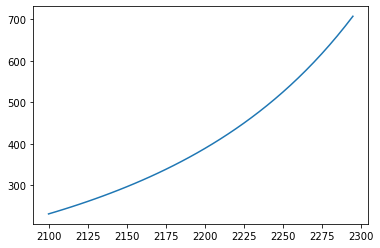

In [5]:
plt.plot(np.arange(2100, 2300, 5),df1.pCO2in)

In [6]:
df2 = co2sys(dic=None, alk=2400, pco2=np.arange(200,700,5), fco2=None, pH=None,
    carb=None, bicarb=None, co2aq=None,
    temp_in=10, temp_out=10, pres_in=0, pres_out=0,
    sal=35, si=0, po4=0, nh3=0, h2s=0,
    K1K2_constants=4, KSO4_constants=1, KF_constant=1, pHscale_in=1,
    buffers_mode="auto", verbose=True)

Convert data to pandas.DataFrame
Removing nans for efficiency
Computing CO2 parameters
Insert nans back into DataFrame


In [7]:
df3 = co2sys(dic=None, alk=2400, pco2=np.arange(200,700,5), fco2=None, pH=None,
    carb=None, bicarb=None, co2aq=None,
    temp_in=10,sal=35, si=0, po4=0, nh3=0, h2s=0,
    K1K2_constants=4, KSO4_constants=1, KF_constant=1, pHscale_in=1,
    buffers_mode="auto", verbose=True)

Convert data to pandas.DataFrame
Removing nans for efficiency
Computing CO2 parameters
Insert nans back into DataFrame


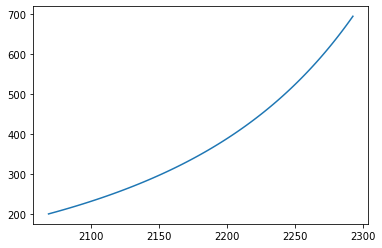

In [8]:
plt.plot(df3.TCO2,df3.pCO2in)

In [9]:
directory = '/Users/ph290/Downloads/'
file1 = directory+'test_thetao_Omon_UKESM1-0-LL_historical_r1i1p1f2_gn_200001-201412.nc'
file2 = directory+'test_so_Omon_UKESM1-0-LL_historical_r1i1p1f2_gn_200001-201412.nc'
file3 = directory+'test_dissic_Omon_UKESM1-0-LL_historical_r1i1p1f2_gn_200001-201412.nc'
file4 = directory+'test_talk_Omon_UKESM1-0-LL_historical_r1i1p1f2_gn_200001-201412.nc'
file5 = directory+'test_spco2_Omon_UKESM1-0-LL_historical_r1i1p1f2_gn_195001-201412.nc'

c_thetao = iris.load_cube(file1)
c_so = iris.load_cube(file2)
c_dissic = iris.load_cube(file3)
c_talk = iris.load_cube(file4)
c_spco2 = iris.load_cube(file5)

#create an average of the first 5 years
c_thetao_1 = extract_and_avg_yr_range(c_thetao,2000,2004)
c_so_1 = extract_and_avg_yr_range(c_so,2000,2004)
c_dissic_1 = extract_and_avg_yr_range(c_dissic,2000,2004)
c_talk_1 = extract_and_avg_yr_range(c_talk,2000,2004)
c_spco2_1 = extract_and_avg_yr_range(c_spco2,2000,2004)

#create an average of the last 5 years
c_thetao_2 = extract_and_avg_yr_range(c_thetao,2010,2014)
c_so_2 = extract_and_avg_yr_range(c_so,2010,2014)
c_dissic_2 = extract_and_avg_yr_range(c_dissic,2010,2014)
c_talk_2 = extract_and_avg_yr_range(c_talk,2010,2014)
c_spco2_2 = extract_and_avg_yr_range(c_spco2,2010,2014)

/Users/ph290/miniconda2/envs/mypython3/lib/python3.8/site-packages/iris/fileformats/cf.py:803: UserWarning: Missing CF-netCDF measure variable 'areacello', referenced by netCDF variable 'thetao'
  warnings.warn(message % (variable_name, nc_var_name))
/Users/ph290/miniconda2/envs/mypython3/lib/python3.8/site-packages/iris/fileformats/cf.py:803: UserWarning: Missing CF-netCDF measure variable 'volcello', referenced by netCDF variable 'thetao'
  warnings.warn(message % (variable_name, nc_var_name))
/Users/ph290/miniconda2/envs/mypython3/lib/python3.8/site-packages/iris/fileformats/cf.py:803: UserWarning: Missing CF-netCDF measure variable 'areacello', referenced by netCDF variable 'so'
  warnings.warn(message % (variable_name, nc_var_name))
/Users/ph290/miniconda2/envs/mypython3/lib/python3.8/site-packages/iris/fileformats/cf.py:803: UserWarning: Missing CF-netCDF measure variable 'volcello', referenced by netCDF variable 'so'
  warnings.warn(message % (variable_name, nc_var_name))
/Users

In [10]:


c_thetao_data_1 = prepare_cmip_for_co2sys(c_thetao_1[0])
c_so_data_1 = prepare_cmip_for_co2sys(c_so_1[0])
c_dissic_data_1 = prepare_cmip_for_co2sys(c_dissic_1[0])
c_talk_data_1 = prepare_cmip_for_co2sys(c_talk_1[0])
c_spco2_data_1 = prepare_cmip_for_co2sys(c_spco2_1)

c_thetao_data_2 = prepare_cmip_for_co2sys(c_thetao_2[0])
c_so_data_2 = prepare_cmip_for_co2sys(c_so_2[0])
c_dissic_data_2 = prepare_cmip_for_co2sys(c_dissic_2[0])
c_talk_data_2 = prepare_cmip_for_co2sys(c_talk_2[0])
c_spco2_data_2 = prepare_cmip_for_co2sys(c_spco2_2)

# c_thetao_data = c_thetao[0][0].data.data
# c_thetao_data[np.where(c_thetao[0][0].data.mask)] = np.nan

# c_so_data = c_so[0][0].data.data
# c_so_data[np.where(c_so[0][0].data.mask)] = np.nan

# c_dissic_data = c_dissic[0][0].data.data * 1.0e3
# c_dissic_data[np.where(c_dissic[0][0].data.mask)] = np.nan

# c_talk_data = c_talk[0][0].data.data * 1.0e3
# c_talk_data[np.where(c_talk[0][0].data.mask)] = np.nan

# c_spco2_data = c_spco2[0].data.data * Pa_to_uatm
# c_spco2_data[np.where(c_spco2[0].data.mask)] = np.nan

# df3 = co2sys(dic=c_dissic_data * 1.0e3, alk=c_talk_data * 1.0e3, pco2=None, fco2=None, pH=None,
#     carb=None, bicarb=None, co2aq=None,
#     temp_in=c_thetao_data,sal=c_so_data, si=0, po4=0, nh3=0, h2s=0,
#     K1K2_constants=4, KSO4_constants=1, KF_constant=1, pHscale_in=1,
#     buffers_mode="auto", verbose=True)

df3 = co2sys(dic=None, alk=c_talk_data_2 * 1.0e3, pco2= c_spco2_data_1 * Pa_to_uatm, fco2=None, pH=None,
    carb=None, bicarb=None, co2aq=None,
    temp_in=c_thetao_data_1,sal=c_so_data_1, si=0, po4=0, nh3=0, h2s=0,
    K1K2_constants=4, KSO4_constants=1, KF_constant=1, pHscale_in=1,
    buffers_mode="auto", verbose=True)

TCO2 = df3.TCO2.values.reshape((330, 360))

Convert data to pandas.DataFrame
Removing nans for efficiency
Computing CO2 parameters
Insert nans back into DataFrame


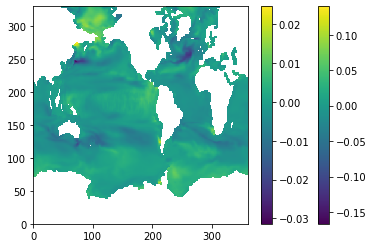

In [19]:
model_dissic_diff = (c_dissic_2[0] - c_dissic_1[0]).data
model_dissic_diff_due_to_alk =(TCO2/1.0e3 - c_dissic_1[0].data)

plt.pcolormesh(model_dissic_diff)
plt.colorbar()

plt.pcolormesh(model_dissic_diff_due_to_alk - model_dissic_diff)
plt.colorbar()

In [12]:
# dir(ccrs)
# help(np.ma.masked_where)

/Users/ph290/miniconda2/envs/mypython3/lib/python3.8/site-packages/iris/analysis/cartography.py:614: UserWarning: Coordinate system of latitude and longitude coordinates is not specified. Assuming WGS84 Geodetic.
  warnings.warn('Coordinate system of latitude and longitude '
/Users/ph290/miniconda2/envs/mypython3/lib/python3.8/site-packages/iris/coords.py:1192: UserWarning: Coordinate 'projection_x_coordinate' is not bounded, guessing contiguous bounds.
  warnings.warn('Coordinate {!r} is not bounded, guessing '
/Users/ph290/miniconda2/envs/mypython3/lib/python3.8/site-packages/iris/coords.py:1192: UserWarning: Coordinate 'projection_y_coordinate' is not bounded, guessing contiguous bounds.
  warnings.warn('Coordinate {!r} is not bounded, guessing '
/Users/ph290/miniconda2/envs/mypython3/lib/python3.8/site-packages/iris/analysis/cartography.py:614: UserWarning: Coordinate system of latitude and longitude coordinates is not specified. Assuming WGS84 Geodetic.
  warnings.warn('Coordinate

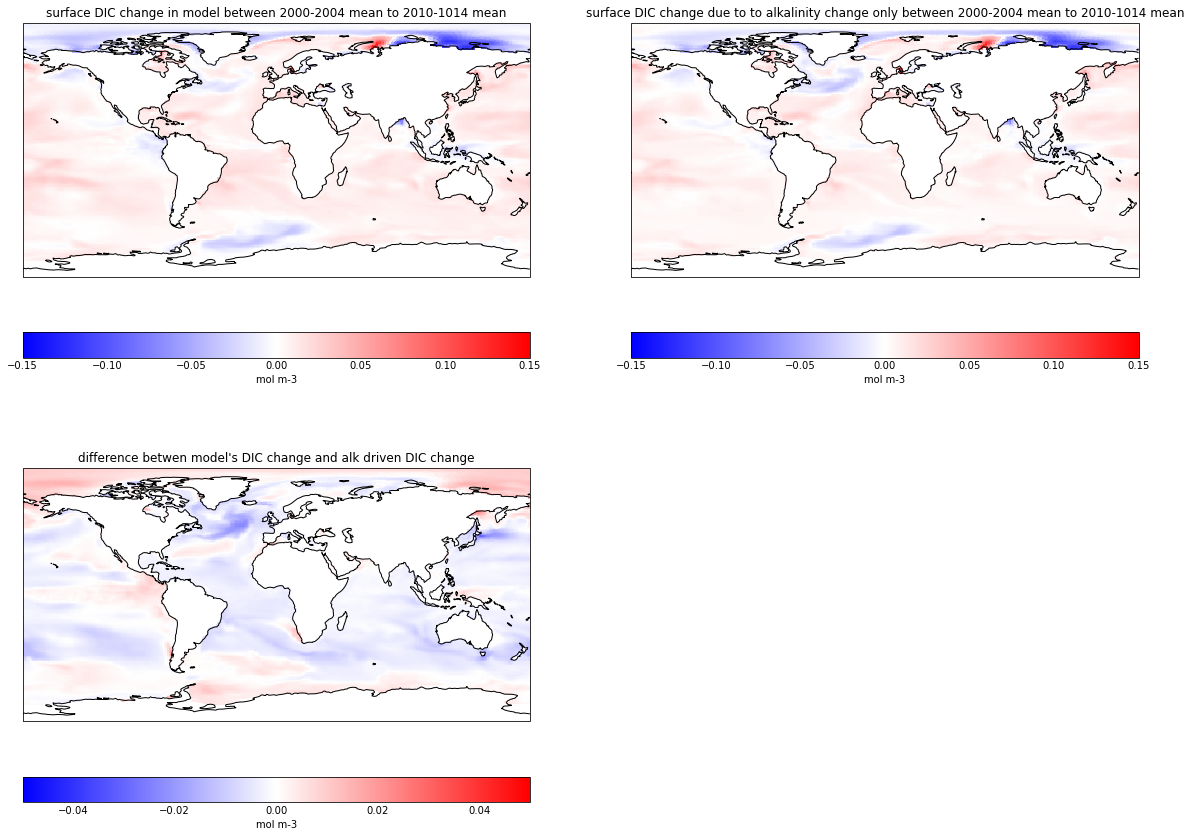

In [22]:

pcarree = ccrs.PlateCarree()

tmp_cube = c_dissic[0][0].copy()

fig = plt.figure(figsize=(20, 15))
gs = gridspec.GridSpec(2, 2)


ax1 = plt.subplot(gs[0, 0], projection=pcarree)
tmp_cube.data = model_dissic_diff
new_cube, extent = iris.analysis.cartography.project(tmp_cube, pcarree,nx=400, ny=200)
contour_result = qplt.pcolormesh(new_cube,vmin = -0.15,vmax=0.150,cmap='bwr')
plt.gca().coastlines()
ax1.set_title('surface DIC change in model between 2000-2004 mean to 2010-1014 mean')
# fig.colorbar(contour_result, cax=ax1)

ax2 = plt.subplot(gs[0, 1], projection=pcarree)
tmp_cube.data = model_dissic_diff_due_to_alk
new_cube, extent = iris.analysis.cartography.project(tmp_cube, pcarree,nx=400, ny=200)
qplt.pcolormesh(new_cube,vmin = -0.150,vmax=0.150,cmap='bwr')
plt.gca().coastlines()
ax2.set_title('surface DIC change due to to alkalinity change only between 2000-2004 mean to 2010-1014 mean')
    
ax3 = plt.subplot(gs[1, 0], projection=pcarree)
tmp_cube.data = model_dissic_diff_due_to_alk - model_dissic_diff
new_cube, extent = iris.analysis.cartography.project(tmp_cube, pcarree,nx=400, ny=200)
qplt.pcolormesh(new_cube,vmin = -0.050,vmax=0.050,cmap='bwr')
plt.gca().coastlines()
ax3.set_title("difference betwen model's DIC change and alk driven DIC change" )

plt.savefig('/Users/ph290/Downloads/ukesm_dic_change.png',dpi=600)